In [1]:
#code to solve 2d Reaction Diffusion equation 
    
import numpy as np
import scipy.linalg as scl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



In [2]:
class Reaction_Diffusion(object):
    
    #constructor to initialise parameters
    def __init__(self,Nx=101,Ny=101,alpha=0.75,b=0.06,mu1=5,mu2=0,h=1,epsilon=50,dt=0.001):
        
      
        self.Nx=Nx
        self.Ny=Ny
        self.alpha=alpha
        self.b=b
        self.mu1=mu1
        self.mu2=mu2
        self.h=h
        self.epsilon=epsilon
        self.dt=dt
        
    
     #initial conditions function 
    def SetInitialConditions(self):
        
        u_initial=np.zeros([self.Ny,self.Nx])
        v_initial=np.zeros([self.Ny,self.Nx])


        for j in range(self.Ny//2,self.Ny):
    
            for i in range(0,self.Nx):
                 u_initial[j,i]=1
            
        for j in range(0,self.Ny):
    
            for i in range(0,self.Nx//2):
                 v_initial[j,i]=self.alpha/2 
                
                
        self.u_initial=u_initial
        self.v_initial=v_initial

      #time integration function
    def Time_Integrate(self):
        #variables
        Nx=self.Nx
        Ny=self.Ny
        alpha=self.alpha
        b=self.b
        mu1=self.mu1
        mu2=self.mu2
        h=self.h
        epsilon=self.epsilon
        dt=self.dt
        
        
        #banded matrices for u and v 
        col = [-3,1] + [0] * (Ny -2)
        lin = [-3,1] + [0] * (Nx -2)
        matrix_u = scl.toeplitz(col, lin)

        for j in range(1,Ny-1):   
    
            matrix_u[j,j]=-4
            matrix_v=matrix_u
       
        u_temp=np.zeros([Ny,Nx])
        v_temp=np.zeros([Ny,Nx])
        
        u_initial=self.u_initial
        v_initial=self.v_initial
        
        
        #10000 timesteps with dt=0.001
        for k in range(10000):

            for j in range(0,Ny):
                if j==0:
                    temp_vector_u_row=mu1*dt/(self.h**2)*matrix_u.dot(u_initial[j,:].T)+u_initial[j,:].T+dt*epsilon*(u_initial[j,:].T)*(1-u_initial[j,:].T)*(u_initial[j,:].T-(v_initial[j,:].T+b)/alpha)+mu1*dt/(h**2)*(u_initial[j+1,:].T+u_initial[j,:].T)
                    temp_vector_v_row=mu2*dt/(h**2)*matrix_v.dot(v_initial[j,:].T)+v_initial[j,:].T+dt*(u_initial[j,:].T**3-v_initial[j,:].T)+mu2*dt/(h**2)*(v_initial[j+1,:].T+v_initial[j,:].T)  
                elif j==Ny-1:
                    temp_vector_u_row=mu1*dt/(h**2)*matrix_u.dot(u_initial[j,:].T)+u_initial[j,:].T+dt*epsilon*(u_initial[j,:].T)*(1-u_initial[j,:].T)*(u_initial[j,:].T-(v_initial[j,:].T+b)/alpha)+mu1*dt/(h**2)*(u_initial[j,:].T+u_initial[j-1,:].T)        
                    temp_vector_v_row=mu2*dt/(h**2)*matrix_v.dot(v_initial[j,:].T)+v_initial[j,:].T+dt*(u_initial[j,:].T**3-v_initial[j,:].T)+mu2*dt/(h**2)*(v_initial[j,:].T+v_initial[j-1,:].T)
                
                
                else:    
                    temp_vector_u_row=mu1*dt/(h**2)*matrix_u.dot(u_initial[j,:].T)+u_initial[j,:].T+dt*epsilon*(u_initial[j,:].T)*(1-u_initial[j,:].T)*(u_initial[j,:].T-(v_initial[j,:].T+b)/alpha)+mu1*dt/(h**2)*(u_initial[j+1,:].T+u_initial[j-1,:].T)        
                    temp_vector_v_row=mu2*dt/(h**2)*matrix_v.dot(v_initial[j,:].T)+v_initial[j,:].T+dt*(u_initial[j,:].T**3-v_initial[j,:].T)+mu2*dt/(h**2)*(v_initial[j+1,:].T+v_initial[j-1,:].T)   
          
            
                
                v_temp[j,:]=temp_vector_v_row
                u_temp[j,:]=temp_vector_u_row
           
            
                
                
            u_initial=u_temp
            v_initial=v_temp
        self.u_initial=u_initial
        self.v_initial=v_initial




 


In [3]:
#implementation of constructor
solution=Reaction_Diffusion()

#implementation of initial conditions
solution.SetInitialConditions()


#implementation of time integration
solution.Time_Integrate()

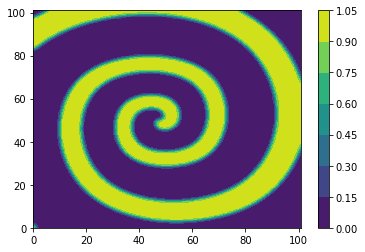

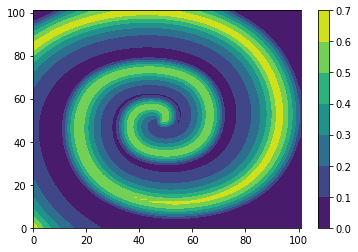

In [4]:
x = np.linspace(0, 101, 101)
y= np.linspace(0, 101, 101)
X, Y = np.meshgrid(x, y) 


# plot solution of u
plt.figure()
plt.contourf(X, Y, solution.u_initial)
plt.colorbar( orientation="vertical")
plt.show()

# plot solution of v
plt.figure()
plt.contourf(X, Y, solution.v_initial)
plt.colorbar( orientation="vertical")
plt.show()


